In [1]:
# unzipping the folder which contain train and test folder inside that images folder equal to no. of classes
! unzip "/content/drive/MyDrive/Colab Notebooks/Computer Vision/Yoga_dataset.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Computer Vision/Yoga_dataset.zip
   creating: Yoga_dataset/TEST/
   creating: Yoga_dataset/TEST/downdog/
  inflating: Yoga_dataset/TEST/downdog/00000000.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000001.JPG  
  inflating: Yoga_dataset/TEST/downdog/00000002.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000003.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000004.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000005.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000006.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000007.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000008.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000009.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000010.png  
  inflating: Yoga_dataset/TEST/downdog/00000011.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000012.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000013.jpg  
  inflating: Yoga_dataset/TEST/downdog/00000014.jpg  
  inflating: Yoga_dataset/TEST/downd

In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [3]:
# importing os module to check no. of images present inside the folder
import os

train_tree_dir = '/content/Yoga_dataset/TRAIN/tree'
# train_cricket_dir = '/content/cricket-football-baseball/train/cricket'
# train_football_dir = '/content/cricket-football-baseball/train/football'

test_tree_dir = '/content/Yoga_dataset/TEST/tree'
# test_cricket_dir = '/content/cricket-football-baseball/test/cricket'
# test_football_dir = '/content/cricket-football-baseball/test/football'

In [4]:
print('total train tree images:', len(os.listdir(train_tree_dir)))
# print('total train cricket images:', len(os.listdir(train_cricket_dir)))
# print('total train football images:', len(os.listdir(train_football_dir)))

print('total test tree images:', len(os.listdir(test_tree_dir)))
# print('total test cricket images:', len(os.listdir(test_cricket_dir)))
# print('total test football images:', len(os.listdir(test_football_dir)))


total train tree images: 160
total test tree images: 69


In [6]:
# ImageDataGenerator is used for augmentation (scaling,rotate,flip,shift and so on) of all images inside a folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/Yoga_dataset/TRAIN'
test_dir = '/content/Yoga_dataset/TEST'

In [7]:
# Preventing errors with truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Function to remove corrupted images
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))

In [8]:
# Removing corrupted images
classes = ['downdog','tree']
for cls in classes:
    removeCorruptedImages(os.path.join(train_dir, cls))
    removeCorruptedImages(os.path.join(test_dir, cls))

In [9]:
# In model1 we use only scaling in generator now we will Use more augmentation
train_datagen_augment = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_augment = train_datagen_augment.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=4,
                                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=4,
                                                  class_mode='categorical')

Found 383 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [10]:
# importing VGG16 predefined model from keras.applications
from tensorflow.keras.applications import VGG16

In [11]:
# creating object of vgg16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# weights= imagenet means use all parameter used in imagenet competition
# include_top = false means drop dense layer use only convo base layer
# inpute shape is as per our requirement

58889256/58889256 [==============================] - 0s 0us/step


In [16]:
# Define model with futher layers
model3 = Sequential()
model3.add(vgg16)
model3.add(Flatten())
# model3.add(Dense(256, activation="relu"))
# model3.add(Dropout(0.2))
model3.add(Dense(2, activation='softmax'))

vgg16.trainable = False
# dont train it because it already well trained

In [17]:
# Compiling the model and fitting on the train data
model3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model3.fit_generator(train_generator_augment,epochs=10)

Epoch 1/10


<ipython-input-17-ca55a21103d3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model3.fit_generator(train_generator_augment,epochs=10)


96/96 [==============================] - 232s 2s/step - loss: 0.6881 - accuracy: 0.7728
Epoch 2/10
96/96 [==============================] - 235s 2s/step - loss: 0.3171 - accuracy: 0.8930
Epoch 3/10
96/96 [==============================] - 231s 2s/step - loss: 0.3205 - accuracy: 0.8877
Epoch 4/10
96/96 [==============================] - 235s 2s/step - loss: 0.2682 - accuracy: 0.9191
Epoch 5/10
96/96 [==============================] - 232s 2s/step - loss: 0.1322 - accuracy: 0.9582
Epoch 6/10
96/96 [==============================] - 234s 2s/step - loss: 0.1749 - accuracy: 0.9556
Epoch 7/10
96/96 [==============================] - 233s 2s/step - loss: 0.2613 - accuracy: 0.9060
Epoch 8/10
96/96 [==============================] - 232s 2s/step - loss: 0.1957 - accuracy: 0.9321
Epoch 9/10
96/96 [==============================] - 231s 2s/step - loss: 0.0594 - accuracy: 0.9765
Epoch 10/10
96/96 [==============================] - 232s 2s/step - loss: 0.1571 - accuracy: 0.9530


In [18]:
# Checking Testing loss and Accuracy
test_loss, test_accuracy = model3.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

42/42 [==============================] - 100s 2s/step - loss: 0.0882 - accuracy: 0.9518
0.08822499960660934
0.9518072009086609


In [19]:
# save model as a h5 file
model3.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# let's define a function for prediction new image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model=load_model("model_vgg16.h5")
def pred(img_path):
  img = image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  model.predict(img_data)
  classes = list(train_generator_augment.class_indices.keys())
  print(f"Prediction is : {classes[np.argmax(model.predict(img_data))]}")
  plt.imshow(img)
  plt.show()


1/1 [==============================] - 1s 537ms/step
Prediction is : downdog


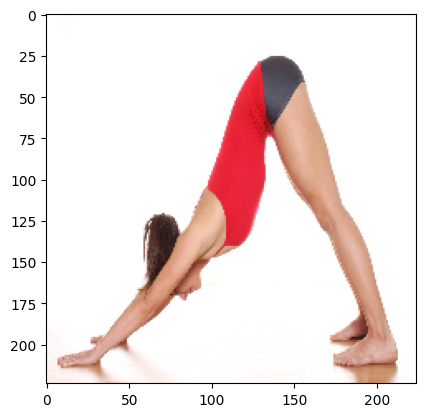

In [25]:
pred("/content/Yoga_dataset/TEST/downdog/00000006.jpg")